# name: Ansh Shukla
# topic: fifa dataset analysis

# importing modules and dataset

In [1]:
!pip install plotly

In [2]:
# basic operations
import numpy as np
# for dataframe manipulations
import pandas as pd
from matplotlib.pyplot import figure
import seaborn as sns
import plotly.express as px
# for data visualizations
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

# for missing values
import missingno as mno


# for date time manipulation
import datetime
# for interactivity
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

# setting up the background style for the plots
plt.style.use('fivethirtyeight')

In [3]:
#fifad=pd.read_csv(r'D:\00000\work\other\skillVertex data science course\major and minor project drive files\drive-download-20220207T135035Z-001\fifa player performance.zip (Unzipped Files)\fifa player performance\football.csv')
fifad=pd.read_csv('football.csv')

In [4]:
fifdf=pd.DataFrame(fifad)

In [5]:
fifdf

Unnamed: 0      ID                Name  Age  \
0               0  158023            L. Messi   31   
1               1   20801   Cristiano Ronaldo   33   
2               2  190871           Neymar Jr   26   
3               3  193080              De Gea   27   
4               4  192985        K. De Bruyne   27   
...           ...     ...                 ...  ...   
18202       18202  238813        J. Lundstram   19   
18203       18203  243165  N. Christoffersson   19   
18204       18204  241638           B. Worman   16   
18205       18205  246268      D. Walker-Rice   17   
18206       18206  246269           G. Nugent   16   

                                                Photo Nationality  \
0      https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1       https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2      https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3      https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4      https://cdn.sofifa.org/players/4/19/192985.png     Belgium   
...                                               ...         ...   
18202  https://cdn.sofifa.org/players/4/19/238813.png     England   
18203  https://cdn.sofifa.org/players/4/19/243165.png      Sweden   
18204  https://cdn.sofifa.org/players/4/19/241638.png     England   
18205  https://cdn.sofifa.org/players/4/19/246268.png     England   
18206  https://cdn.sofifa.org/players/4/19/246269.png     England   

                                      Flag  Overall  Potential  \
0      https://cdn.sofifa.org/flags/52.png       94         94   
1      https://cdn.sofifa.org/flags/38.png       94         94   
2      https://cdn.sofifa.org/flags/54.png       92         93   
3      https://cdn.sofifa.org/flags/45.png       91         93   
4       https://cdn.sofifa.org/flags/7.png       91         92   
...                                    ...      ...        ...   
18202  https://cdn.sofifa.org/flags/14.png       47         65   
18203  https://cdn.sofifa.org/flags/46.png       47         63   
18204  https://cdn.sofifa.org/flags/14.png       47         67   
18205  https://cdn.sofifa.org/flags/14.png       47         66   
18206  https://cdn.sofifa.org/flags/14.png       46         66   

                      Club  ... Composure Marking StandingTackle  \
0             FC Barcelona  ...      96.0    33.0           28.0   
1                 Juventus  ...      95.0    28.0           31.0   
2      Paris Saint-Germain  ...      94.0    27.0           24.0   
3        Manchester United  ...      68.0    15.0           21.0   
4          Manchester City  ...      88.0    68.0           58.0   
...                    ...  ...       ...     ...            ...   
18202      Crewe Alexandra  ...      45.0    40.0           48.0   
18203       Trelleborgs FF  ...      42.0    22.0           15.0   
18204     Cambridge United  ...      41.0    32.0           13.0   
18205      Tranmere Rovers  ...      46.0    20.0           25.0   
18206      Tranmere Rovers  ...      43.0    40.0           43.0   

       SlidingTackle GKDiving  GKHandling  GKKicking  GKPositioning  \
0               26.0      6.0        11.0       15.0           14.0   
1               23.0      7.0        11.0       15.0           14.0   
2               33.0      9.0         9.0       15.0           15.0   
3               13.0     90.0        85.0       87.0           88.0   
4               51.0     15.0        13.0        5.0           10.0   
...              ...      ...         ...        ...            ...   
18202           47.0     10.0        13.0        7.0            8.0   
18203           19.0     10.0         9.0        9.0            5.0   
18204           11.0      6.0         5.0       10.0            6.0   
18205           27.0     14.0         6.0       14.0            8.0   
18206           50.0     10.0        15.0        9.0           12.0   

      GKReflexes Release Clause  
0            8.0        €226.5M 

# cleaning data by removing unnecessary rows

In [6]:
fifdf.drop(["ID","Flag","Unnamed: 0","Photo","Club Logo"],axis=1,inplace=True)

In [7]:
fifdf.head()

Name  Age Nationality  Overall  Potential  \
0           L. Messi   31   Argentina       94         94   
1  Cristiano Ronaldo   33    Portugal       94         94   
2          Neymar Jr   26      Brazil       92         93   
3             De Gea   27       Spain       91         93   
4       K. De Bruyne   27     Belgium       91         92   

                  Club    Value   Wage  Special Preferred Foot  ...  \
0         FC Barcelona  €110.5M  €565K     2202           Left  ...   
1             Juventus     €77M  €405K     2228          Right  ...   
2  Paris Saint-Germain  €118.5M  €290K     2143          Right  ...   
3    Manchester United     €72M  €260K     1471          Right  ...   
4      Manchester City    €102M  €355K     2281          Right  ...   

   Composure  Marking  StandingTackle SlidingTackle GKDiving GKHandling  \
0       96.0     33.0            28.0          26.0      6.0       11.0   
1       95.0     28.0            31.0          23.0      7.0       11.0   
2       94.0     27.0            24.0          33.0      9.0        9.0   
3       68.0     15.0            21.0          13.0     90.0       85.0   
4       88.0     68.0            58.0          51.0     15.0       13.0   

  GKKicking  GKPositioning GKReflexes Release Clause  
0      15.0           14.0        8.0        €226.5M  
1      15.0           14.0       11.0        €127.1M  
2      15.0           15.0       11.0        €228.1M  
3      87.0           88.0       94.0        €138.6M  
4       5.0           10.0       13.0        €196.4M  

[5 rows x 84 columns]

In [8]:
fifdf.tail()

Name  Age Nationality  Overall  Potential  \
18202        J. Lundstram   19     England       47         65   
18203  N. Christoffersson   19      Sweden       47         63   
18204           B. Worman   16     England       47         67   
18205      D. Walker-Rice   17     England       47         66   
18206           G. Nugent   16     England       46         66   

                   Club Value Wage  Special Preferred Foot  ...  Composure  \
18202   Crewe Alexandra  €60K  €1K     1307          Right  ...       45.0   
18203    Trelleborgs FF  €60K  €1K     1098          Right  ...       42.0   
18204  Cambridge United  €60K  €1K     1189          Right  ...       41.0   
18205   Tranmere Rovers  €60K  €1K     1228          Right  ...       46.0   
18206   Tranmere Rovers  €60K  €1K     1321          Right  ...       43.0   

       Marking  StandingTackle SlidingTackle GKDiving GKHandling GKKicking  \
18202     40.0            48.0          47.0     10.0       13.0       7.0   
18203     22.0            15.0          19.0     10.0        9.0       9.0   
18204     32.0            13.0          11.0      6.0        5.0      10.0   
18205     20.0            25.0          27.0     14.0        6.0      14.0   
18206     40.0            43.0          50.0     10.0       15.0       9.0   

       GKPositioning GKReflexes Release Clause  
18202            8.0        9.0          €143K  
18203            5.0       12.0          €113K  
18204            6.0       13.0          €165K  
18205            8.0        9.0          €143K  
18206           12.0        9.0          €165K  

[5 rows x 84 columns]

# players rated above 90 (univariate and bivariate analysis)

In [9]:
players90plus=fifdf.loc[fifdf["Overall"]>=90]

In [10]:
players90plus

Name  Age Nationality  Overall  Potential  \
0            L. Messi   31   Argentina       94         94   
1   Cristiano Ronaldo   33    Portugal       94         94   
2           Neymar Jr   26      Brazil       92         93   
3              De Gea   27       Spain       91         93   
4        K. De Bruyne   27     Belgium       91         92   
5           E. Hazard   27     Belgium       91         91   
6           L. Modrić   32     Croatia       91         91   
7           L. Suárez   31     Uruguay       91         91   
8        Sergio Ramos   32       Spain       91         91   
9            J. Oblak   25    Slovenia       90         93   
10     R. Lewandowski   29      Poland       90         90   
11           T. Kroos   28     Germany       90         90   
12           D. Godín   32     Uruguay       90         90   
13        David Silva   32       Spain       90         90   

                   Club    Value   Wage  Special Preferred Foot  ...  \
0          FC Barcelona  €110.5M  €565K     2202           Left  ...   
1              Juventus     €77M  €405K     2228          Right  ...   
2   Paris Saint-Germain  €118.5M  €290K     2143          Right  ...   
3     Manchester United     €72M  €260K     1471          Right  ...   
4       Manchester City    €102M  €355K     2281          Right  ...   
5               Chelsea     €93M  €340K     2142          Right  ...   
6           Real Madrid     €67M  €420K     2280          Right  ...   
7          FC Barcelona     €80M  €455K     2346          Right  ...   
8           Real Madrid     €51M  €380K     2201          Right  ...   
9       Atlético Madrid     €68M   €94K     1331          Right  ...   
10    FC Bayern München     €77M  €205K     2152          Right  ...   
11          Real Madrid   €76.5M  €355K     2190          Right  ...   
12      Atlético Madrid     €44M  €125K     1946          Right  ...   
13      Manchester City     €60M  €285K     2115           Left  ...   

    Composure  Marking  StandingTackle SlidingTackle GKDiving GKHandling  \
0        96.0     33.0            28.0          26.0      6.0       11.0   
1        95.0     28.0            31.0          23.0      7.0       11.0   
2        94.0     27.0            24.0          33.0      9.0        9.0   
3        68.0     15.0            21.0          13.0     90.0       85.0   
4        88.0     68.0            58.0          51.0     15.0       13.0   
5        91.0     34.0            27.0          22.0     11.0       12.0   
6        84.0     60.0            76.0          73.0     13.0        9.0   
7        85.0     62.0            45.0          38.0     27.0       25.0   
8        82.0     87.0            92.0          91.0     11.0        8.0   
9        70.0     27.0            12.0          18.0     86.0       92.0   
10       86.0     34.0            42.0          19.0     15.0        6.0   
11       85.0     72.0            79.0          69.0     10.0       11.0   
12       82.0     90.0            89.0          89.0      6.0        8.0   
13       93.0     59.0            53.0          29.0      6.0       15.0   

   GKKicking  GKPositioning GKReflexes Release Clause  
0       15.0           14.0        8.0        €226.5M  
1       15.0           14.0       11.0        €127.1M  
2       15.0           15.0       11.0        €228.1M  
3       87.0           88.0       94.0        €138.6M  
4        5.0           10.0       13.0        €196.4M  
5        6.0            8.0        8.0        €172.1M  
6        7.0           14.0        9.0        €137.4M  
7       31.0           33.0       37.0          €164M  
8        9.0            7.0       11.0        €104.6M  
9       78.0           88.0       89.0        €144.5M  
10      12.0            8.0       10.0        €127.1M  
11      13.0            7.0       10.0        €156.8M  
12      15.0            5.0       15.0         €90.2M  
13       7.0            6.0       12.0          €111M  

[14 rows x 84 columns]

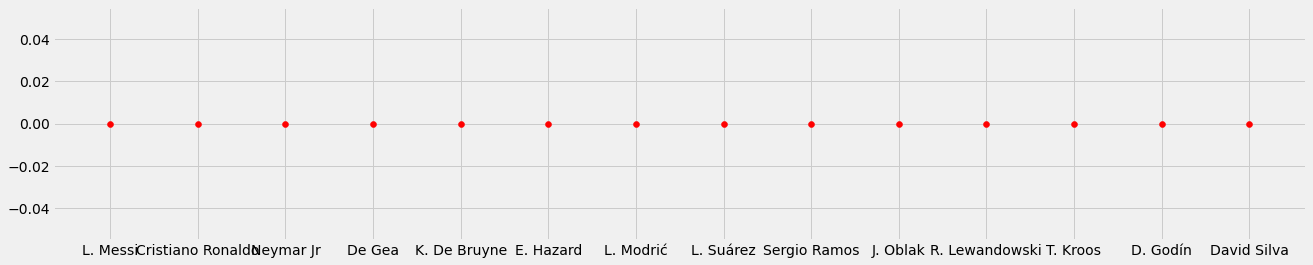

In [11]:
plt.figure(figsize=(20,4))
plt.scatter(players90plus["Name"],np.zeros_like(players90plus["Name"]),c='red')
plt.show()

#this plot shows names of all players rated 90 or above thus univariate analysis

 
 thus we have the univariate analysis of the players that are rated above 90 (univariate=>only one variable, here the variable is Name of the players) 

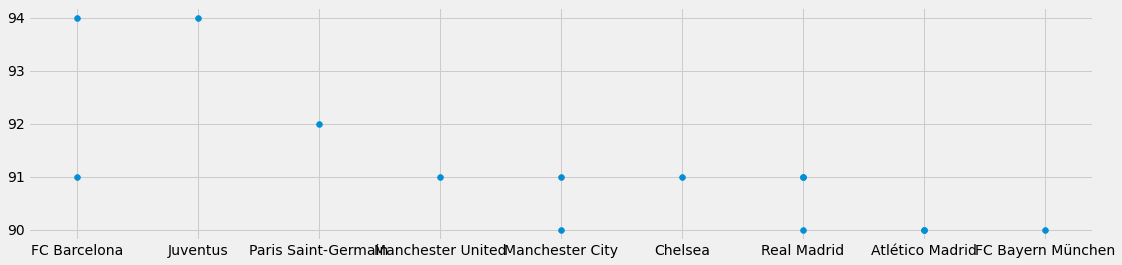

In [12]:
plt.figure(figsize=(17,4))
plt.scatter(players90plus["Club"],players90plus["Overall"])

plt.show()

here we have two variables: club and overall rating thus this is the bivariate analysis of players90plus dataframe

# players playing for a club

In [13]:
playersClub = fifdf.loc[fifdf["Club"]=="Real Madrid"]

# replace real madrid with club name to get players from specific club

In [14]:
playersClub

Name  Age         Nationality  Overall  Potential  \
6            L. Modrić   32             Croatia       91         91   
8         Sergio Ramos   32               Spain       91         91   
11            T. Kroos   28             Germany       90         90   
19         T. Courtois   26             Belgium       89         90   
27            Casemiro   26              Brazil       88         90   
30                Isco   26               Spain       88         91   
35             Marcelo   30              Brazil       88         88   
36             G. Bale   28               Wales       88         88   
46            K. Navas   31          Costa Rica       87         87   
62           R. Varane   25              France       86         91   
79       Marco Asensio   22               Spain       85         92   
105         K. Benzema   30              France       85         85   
123           Carvajal   26               Spain       84         87   
172      Lucas Vázquez   27               Spain       83         83   
188    Nacho Fernández   28               Spain       83         85   
328      Dani Ceballos   21               Spain       81         88   
417          Odriozola   22               Spain       80         88   
430            Mariano   24  Dominican Republic       80         85   
573    Marcos Llorente   23               Spain       79         87   
697       Kiko Casilla   31               Spain       79         79   
754            Vallejo   21               Spain       78         86   
1143   Vinícius Júnior   17              Brazil       77         92   
2513       F. Valverde   19             Uruguay       74         84   
6724          Reguilón   21               Spain       68         80   
8732      Javi Sánchez   21               Spain       67         79   
9141   Cristo González   20               Spain       66         78   
10178  F. Feuillassier   20           Argentina       65         80   
10269          Fidalgo   21               Spain       65         75   
11163     Sergio López   19               Spain       64         80   
11327      Fran García   18               Spain       64         79   
11877    Manu Hernando   19               Spain       64         76   
12504       Dani Gómez   19               Spain       63         77   
13687        L. Zidane   20              France       62         71   

              Club   Value   Wage  Special Preferred Foot  ...  Composure  \
6      Real Madrid    €67M  €420K     2280          Right  ...       84.0   
8      Real Madrid    €51M  €380K     2201          Right  ...       82.0   
11     Real Madrid  €76.5M  €355K     2190          Right  ...       85.0   
19     Real Madrid  €53.5M  €240K     1311           Left  ...       66.0   
27     Real Madrid  €59.5M  €285K     2170          Right  ...       84.0   
30     Real Madrid  €73.5M  €315K     2137          Right  ...       86.0   
35     Real Madrid    €43M  €285K     2279           Left  ...       86.0   
36     Real Madrid    €60M  €355K     2279           Left  ...       86.0   
46     Real Madrid  €30.5M  €195K     1345          Right  ...       67.0   
62     Real Madrid    €50M  €210K     1895          Right  ...       82.0   
79     Real Madrid    €54M  €215K     2050           Left  ...       83.0   
105    Real Madrid    €37M  €240K     2000          Right  ...       79.0   
123    Real Madrid  €31.5M  €185K     2040          Right  ...       77.0   
172    Real Madrid    €27M  €205K     2048          Right  ...       75.0   
188    Real Madrid  €24.5M  €180K     1855          Right  ...       73.0   
328    Real Madrid    €25M  €120K     2059          Right  ...       80.0   
417    Real Madrid  €18.5M  €115K     1991          Right  ...       69.0   
430    Real Madrid    €20M  €140K     2041          Right  ...       68.0   
573    Real Madrid    €16M  €110K     1869          Right  ...       76.0   
697    Real Madrid   €7.5M  €105K     1279          Right  ... 

# players from a nationality 



In [15]:
IndiaNt = fifdf.loc[fifdf["Nationality"]=="India"]

In [16]:
#sorting players by overall rating from high to low

IndiaNt.sort_values(by="Overall",ascending=False)

Name  Age Nationality  Overall  Potential Club Value Wage  \
8605        S. Chhetri   33       India       67         67  NaN    €0   €0   
10011       S. Jhingan   24       India       65         71  NaN    €0   €0   
12598    J. Lalpekhlua   27       India       63         64  NaN    €0   €0   
12811  G. Singh Sandhu   26       India       63         68  NaN    €0   €0   
13508    A. Edathodika   31       India       62         62  NaN    €0   €0   
14054        P. Halder   25       India       61         67  NaN    €0   €0   
14199         P. Kotal   24       India       61         66  NaN    €0   €0   
14218         L. Ralte   25       India       61         62  NaN    €0   €0   
14705           N. Das   24       India       60         65  NaN    €0   €0   
14786         U. Singh   22       India       60         67  NaN    €0   €0   
14915       H. Narzary   24       India       60         66  NaN    €0   €0   
15356         R. Singh   28       India       59         59  NaN    €0   €0   
15643         S. Singh   22       India       59         65  NaN    €0   €0   
15652         A. Thapa   20       India       59         71  NaN    €0   €0   
16135          S. Bose   22       India       58         66  NaN    €0   €0   
16265        R. Borges   26       India       58         60  NaN    €0   €0   
15864         A. Singh   25       India       58         62  NaN    €0   €0   
15884         B. Singh   31       India       58         58  NaN    €0   €0   
15855       M. Rafique   25       India       58         61  NaN    €0   €0   
16450          S. Paul   31       India       57         57  NaN    €0   €0   
16499        A. Mondal   28       India       57         57  NaN    €0   €0   
16539  L. Lalruatthara   23       India       57         63  NaN    €0   €0   
16793       E. Lyngdoh   31       India       56         56  NaN    €0   €0   
16903   J. Lalrinzuala   19       India       56         64  NaN    €0   €0   
16976     A. Kuruniyan   21       India       56         70  NaN    €0   €0   
17129         J. Singh   26       India       55         58  NaN    €0   €0   
17197         V. Kaith   21       India       55         64  NaN    €0   €0   
17339         S. Passi   23       India       54         63  NaN    €0   €0   
17436   D. Lalhlimpuia   20       India       54         67  NaN    €0   €0   
17539         C. Singh   21       India       53         62  NaN    €0   €0   

       Special Preferred Foot  ...  Composure  Marking  StandingTackle  \
8605      1704          Right  ...       67.0     30.0            24.0   
10011     1472          Right  ...       64.0     64.0            61.0   
12598     1630          Right  ...       47.0     28.0            31.0   
12811     1063          Right  ...       57.0     19.0            15.0   
13508     1384           Left  ...       49.0     67.0            62.0   
14054     1570          Right  ...       57.0     60.0            57.0   
14199     1530          Right  ...       55.0     63.0            58.0   
14218     1566           Left  ...       54.0     36.0            29.0   
14705     1470           Left  ...       57.0     62.0            67.0   
14786     1566          Right  ...       56.0     24.0            32.0   
14915     1494           Left  ...       52.0     16.0            21.0   
15356     1419           Left  ...       46.0     20.0            16.0   
15643     1322          Right  ...       42.0     58.0            63.0   
15652     1589          Right  ...       60.0     47.0            56.0   
16135     1419           Left  ...       52.0     61.0            62.0   
16265     1426          Right  ...       40.0     54.0            56.0   
15864     1065          Right  ...       57.0     16.0            17.0   
15884     1420          Right  ...       51.0     23.0            12.0   
15855     1592          Right  ...       42.0     53.0            63.0   
16450     1032          Right  ...       52.0     12.0            15.0   
16499     1328

## Age distribution of players

C:\Users\asash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


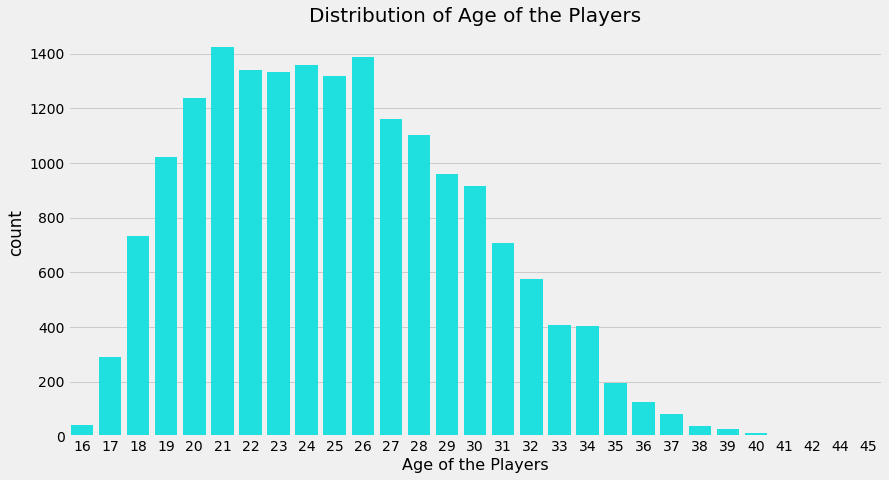

In [17]:
agedis=fifdf["Age"]
plt.figure(figsize=[13,7])
ageplot=sns.countplot(agedis,color="#00ffff")
ageplot.set_xlabel(xlabel = 'Age of the Players', fontsize = 16)
ageplot.set_title(label = 'Distribution of Age of the Players', fontsize = 20)
plt.show()

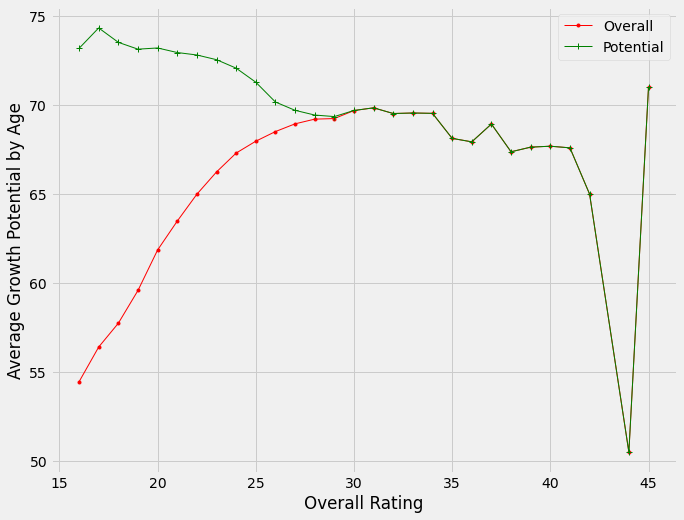

In [18]:
overall = pd.DataFrame(fifad.groupby(["Age"])['Overall'].mean())
potential = pd.DataFrame(fifad.groupby(["Age"])['Potential'].mean())

merged = pd.merge(overall, potential, on='Age', how='inner')
merged['Age']= merged.index

fig, ax = plt.subplots(figsize=(10,8))

merged.reset_index(drop = True, inplace = True)

plt.plot('Age', 'Overall', data=merged, marker='.', color='red', lw=1, label ="Overall" )
plt.plot('Age', 'Potential', data=merged, marker='+', color='green', lw=1, label = "Potential")
plt.xlabel('Overall Rating')
plt.ylabel('Average Growth Potential by Age')
plt.legend();

In [19]:
import matplotlib.image as mpimg

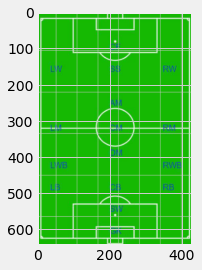

In [20]:

img = mpimg.imread('playerpositionimg.png')
plt.imshow(img)


# correlation analysis

In [21]:
fifdf.corr()

Age   Overall  Potential   Special  \
Age                       1.000000  0.452350  -0.253312  0.236695   
Overall                   0.452350  1.000000   0.660939  0.606960   
Potential                -0.253312  0.660939   1.000000  0.383727   
Special                   0.236695  0.606960   0.383727  1.000000   
International Reputation  0.253765  0.499491   0.372993  0.292208   
Weak Foot                 0.059867  0.212015   0.162346  0.341855   
Skill Moves               0.027649  0.414463   0.354290  0.763412   
Jersey Number            -0.241156 -0.218931  -0.010474 -0.133716   
Crossing                  0.130545  0.394972   0.246319  0.866417   
Finishing                 0.068660  0.332515   0.243355  0.724244   
HeadingAccuracy           0.147183  0.340776   0.200988  0.644421   
ShortPassing              0.132894  0.502550   0.369189  0.906729   
Volleys                   0.142472  0.391338   0.254906  0.773974   
Dribbling                 0.010166  0.372426   0.315019  0.874274   
Curve                     0.143276  0.419491   0.279944  0.851900   
FKAccuracy                0.193467  0.396892   0.230544  0.806414   
LongPassing               0.181310  0.483909   0.321437  0.846302   
BallControl               0.084969  0.460197   0.354396  0.912107   
Acceleration             -0.158667  0.196869   0.234608  0.654337   
SprintSpeed              -0.151682  0.210647   0.236771  0.645963   
Agility                  -0.019395  0.264952   0.222310  0.699673   
Reactions                 0.453124  0.850045   0.513425  0.597169   
Balance                  -0.089877  0.103160   0.138025  0.586788   
ShotPower                 0.156947  0.441118   0.288318  0.835277   
Jumping                   0.177167  0.264435   0.109151  0.321846   
Stamina                   0.097793  0.365656   0.202563  0.792762   
Strength                  0.332798  0.349326   0.075769  0.192990   
LongShots                 0.155096  0.420795   0.266740  0.840049   
Aggression                0.265190  0.395470   0.171174  0.666236   
Interceptions             0.197845  0.321326   0.154908  0.561676   
Positioning               0.082443  0.356493   0.245616  0.824307   
Vision                    0.187422  0.498894   0.348141  0.761992   
Penalties                 0.139535  0.341429   0.224281  0.734533   
Composure                 0.391023  0.727655   0.440008  0.752331   
Marking                   0.142817  0.286505   0.162801  0.561866   
StandingTackle            0.119745  0.252629   0.143564  0.538802   
SlidingTackle             0.103089  0.222811   0.128980  0.506968   
GKDiving                  0.101277 -0.025937  -0.053446 -0.674637   
GKHandling                0.106419 -0.025062  -0.054672 -0.673625   
GKKicking                 0.104964 -0.029372  -0.059061 -0.670254   
GKPositioning             0.116402 -0.017674  -0.052589 -0.668272   
GKReflexes                0.103313 -0.023276  -0.053341 -0.673238   

                          International Reputation  Weak Foot  Skill Moves  \
Age                                       0.253765   0.059867     0.027649   
Overall                                   0.499491   0.212015     0.414463   
Potential                                 0.372993   0.162346     0.354290   
Special                                   0.292208   0.341855     0.763412   
International Reputation                  1.000000   0.128317     0.208153   
Weak Foot                                 0.128317   1.000000     0.340721   
Skill Moves                               0.208153   0.340721     1.000000   
Jersey Number                            -0.077298  -0.035410    -0.035194   
Crossing                                  0.191770   0.307925     0.741035   
Finishing                                 0.178373   0.357416     0.743439   
HeadingAccuracy                           0.157483   0.183238     0.443005   
ShortPassing                              0.242803   0.322133     0.730363   
Volleys                                   0.24308

C:\Users\asash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Preferred Foot', ylabel='count'>

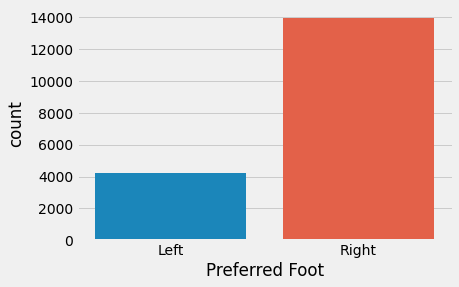

In [22]:
sns.countplot(fifdf["Preferred Foot"])

#most players prefer the right foot to left

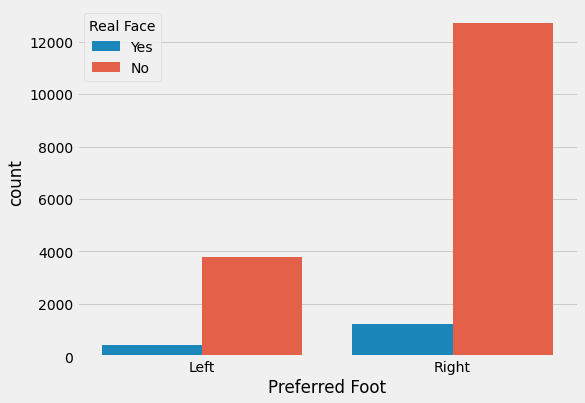

In [23]:
f, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x="Preferred Foot", hue="Real Face", data=fifad)
plt.show()

# top 10 left footed players

In [24]:
fifad[fifad['Preferred Foot'] == 'Left'][['Name', 'Age', 'Club',
         'Nationality', 'Overall']].sort_values(by = 'Overall',
            ascending = False).head(10).style.background_gradient(cmap = 'bone')

# Top 10 Right footed footballers

In [25]:
fifad[fifad['Preferred Foot'] == 'Right'][['Name', 'Age', 'Club',
                    'Nationality', 'Overall']].sort_values(by = 'Overall',
                            ascending = False).head(10).style.background_gradient(cmap = 'copper')

C:\Users\asash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Overall', ylabel='count'>

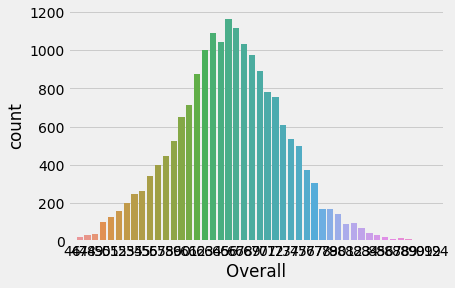

In [26]:
# sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(fifdf["Overall"])

# a count of players with rating (forming a curve which tells us most players are average and a small number
# of players are either very good or very bad)

 thus from the above plot we deduce that most of the players are rated between 57 and 78 and very small amount of players are either very good or very bad.

# label encoding

In [27]:
!pip install -U scikit-learn scipy matplotlib

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
le=LabelEncoder()

In [30]:
y=le.fit_transform(fifdf["Preferred Foot"]) 

#1=righty 0 = lefty

In [31]:
z=le.fit_transform(fifdf["Nationality"])

In [32]:
zdf=pd.DataFrame(z)

In [33]:
zdf.sort_values(by=0, ascending=True)

0
12891    0
15534    0
13644    0
15273    0
16141    1
...    ...
10260  163
3496   163
4360   163
764    163
11684  163

[18207 rows x 1 columns]

In [34]:
fifdf[["Nationality"]].iloc[15273]

#thus we can see 0 means nationality = Afghanistan and so on the countries have been encoded

Nationality    Afghanistan
Name: 15273, dtype: object

In [35]:
fifdf["pref foot numeric"]=y

In [36]:
fifdf["Preferred Foot"]=fifdf["pref foot numeric"]

In [37]:
fifdf["nationality numeric"]=z

In [38]:
fifdf["Nationality"]=fifdf["nationality numeric"]

In [39]:
fifdf

Name  Age  Nationality  Overall  Potential  \
0                L. Messi   31            6       94         94   
1       Cristiano Ronaldo   33          123       94         94   
2               Neymar Jr   26           20       92         93   
3                  De Gea   27          139       91         93   
4            K. De Bruyne   27           13       91         92   
...                   ...  ...          ...      ...        ...   
18202        J. Lundstram   19           46       47         65   
18203  N. Christoffersson   19          144       47         63   
18204           B. Worman   16           46       47         67   
18205      D. Walker-Rice   17           46       47         66   
18206           G. Nugent   16           46       46         66   

                      Club    Value   Wage  Special  Preferred Foot  ...  \
0             FC Barcelona  €110.5M  €565K     2202               0  ...   
1                 Juventus     €77M  €405K     2228               1  ...   
2      Paris Saint-Germain  €118.5M  €290K     2143               1  ...   
3        Manchester United     €72M  €260K     1471               1  ...   
4          Manchester City    €102M  €355K     2281               1  ...   
...                    ...      ...    ...      ...             ...  ...   
18202      Crewe Alexandra     €60K    €1K     1307               1  ...   
18203       Trelleborgs FF     €60K    €1K     1098               1  ...   
18204     Cambridge United     €60K    €1K     1189               1  ...   
18205      Tranmere Rovers     €60K    €1K     1228               1  ...   
18206      Tranmere Rovers     €60K    €1K     1321               1  ...   

       StandingTackle  SlidingTackle  GKDiving GKHandling GKKicking  \
0                28.0           26.0       6.0       11.0      15.0   
1                31.0           23.0       7.0       11.0      15.0   
2                24.0           33.0       9.0        9.0      15.0   
3                21.0           13.0      90.0       85.0      87.0   
4                58.0           51.0      15.0       13.0       5.0   
...               ...            ...       ...        ...       ...   
18202            48.0           47.0      10.0       13.0       7.0   
18203            15.0           19.0      10.0        9.0       9.0   
18204            13.0           11.0       6.0        5.0      10.0   
18205            25.0           27.0      14.0        6.0      14.0   
18206            43.0           50.0      10.0       15.0       9.0   

      GKPositioning GKReflexes  Release Clause pref foot numeric  \
0              14.0        8.0         €226.5M                 0   
1              14.0       11.0         €127.1M                 1   
2              15.0       11.0         €228.1M                 1   
3              88.0       94.0         €138.6M                 1   
4              10.0       13.0         €196.4M                 1   
...             ...        ...             ...               ...   
18202           8.0        9.0           €143K                 1   
18203           5.0       12.0           €113K                 1   
18204           6.0       13.0           €165K                 1   
18205           8.0        9.0           €143K                 1   
18206          12.0        9.0           €165K                 1   

      nationality numeric  
0                       6  
1                     123  
2                      20  
3                     139  
4                      13  
...                   ...  
18202                  46  
18203                 144  
18204                  46  
18205                  46  
18206                  46  

[18207 rows x 86 columns]

 thus we have made the values of nationality and preferred foot into label encoded numerical values which can be read by the interpreter and then we can perform various operations on it

## multivariate analysis (pairplot)

In [57]:
columns=fifdf[['Age', 'Nationality', 'Overall', 'Potential', 'Value',
       'Wage', 'Special', 'Preferred Foot', 'Height', 'Weight']]

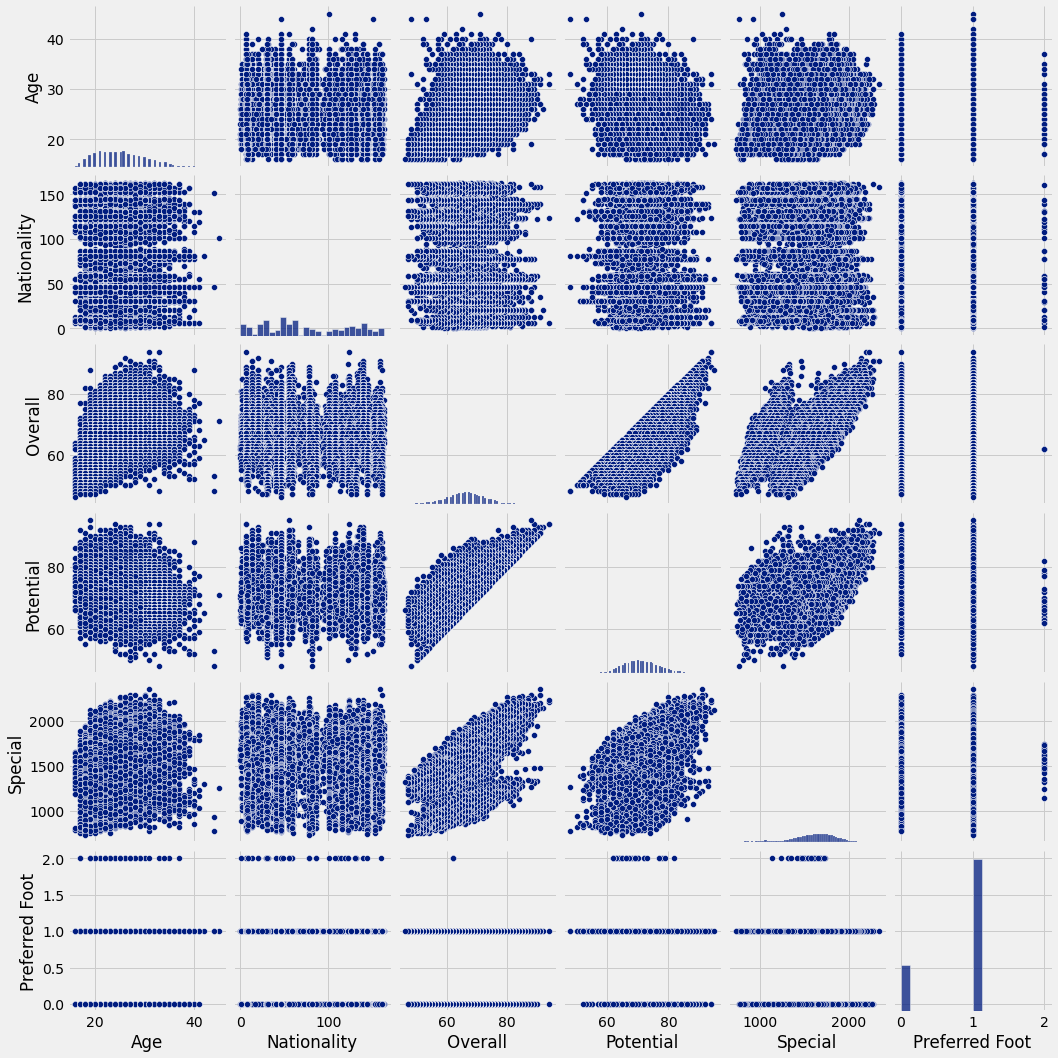

In [58]:
sns.pairplot(columns)

thus we have performed univariate, bivariate and multivariate analysis of the given data

In [42]:
#fifa=pd.read_csv(r'D:\00000\work\other\skillVertex data science course\major and minor project drive files\drive-download-20220207T135035Z-001\fifa player performance.zip (Unzipped Files)\fifa player performance\football.csv')
fifa=pd.read_csv('football.csv')

In [43]:
# filling the missing value for the continous variables for proper data visualization

fifa['ShortPassing'].fillna(fifa['ShortPassing'].mean(), inplace = True)
fifa['Volleys'].fillna(fifa['Volleys'].mean(), inplace = True)
fifa['Dribbling'].fillna(fifa['Dribbling'].mean(), inplace = True)
fifa['Curve'].fillna(fifa['Curve'].mean(), inplace = True)
fifa['FKAccuracy'].fillna(fifa['FKAccuracy'], inplace = True)
fifa['LongPassing'].fillna(fifa['LongPassing'].mean(), inplace = True)
fifa['BallControl'].fillna(fifa['BallControl'].mean(), inplace = True)
fifa['HeadingAccuracy'].fillna(fifa['HeadingAccuracy'].mean(), inplace = True)
fifa['Finishing'].fillna(fifa['Finishing'].mean(), inplace = True)
fifa['Crossing'].fillna(fifa['Crossing'].mean(), inplace = True)

fifa['Weight'].fillna('200lbs', inplace = True)
fifa['Contract Valid Until'].fillna(2019, inplace = True)
fifa['Height'].fillna("5'11", inplace = True)
fifa['Loaned From'].fillna('None', inplace = True)
fifa['Joined'].fillna('Jul 1, 2018', inplace = True)
fifa['Jersey Number'].fillna(8, inplace = True)
fifa['Body Type'].fillna('Normal', inplace = True)
fifa['Position'].fillna('ST', inplace = True)
fifa['Club'].fillna('No Club', inplace = True)
fifa['Work Rate'].fillna('Medium/ Medium', inplace = True)
fifa['Skill Moves'].fillna(fifa['Skill Moves'].median(), inplace = True)
fifa['Weak Foot'].fillna(3, inplace = True)
fifa['Preferred Foot'].fillna('Right', inplace = True)
fifa['International Reputation'].fillna(1, inplace = True)
fifa['Wage'].fillna('€200K', inplace = True)


filling the missing value for the continous variables for proper data visualization

In [44]:
# impute with 0 for rest of the columns
fifa.fillna(0, inplace = True)

# lets check whether the data still has any missing values
fifa.isnull().sum().sum()

0

In [45]:
def defending(fifa):
    return int(round((fifa[['Marking', 'StandingTackle', 
                               'SlidingTackle']].mean()).mean()))

def general(fifa):
    return int(round((fifa[['HeadingAccuracy', 'Dribbling', 'Curve', 
                               'BallControl']].mean()).mean()))

def mental(data):
    return int(round((fifa[['Aggression', 'Interceptions', 'Positioning', 
                               'Vision','Composure']].mean()).mean()))

def passing(fifa):
    return int(round((fifa[['Crossing', 'ShortPassing', 
                               'LongPassing']].mean()).mean()))

def mobility(fifa):
    return int(round((fifa[['Acceleration', 'SprintSpeed', 
                               'Agility','Reactions']].mean()).mean()))
def power(data):
    return int(round((fifa[['Balance', 'Jumping', 'Stamina', 
                               'Strength']].mean()).mean()))

def rating(fifa):
    return int(round((fifa[['Potential', 'Overall']].mean()).mean()))

def shooting(fifa):
    return int(round((fifa[['Finishing', 'Volleys', 'FKAccuracy', 
                               'ShotPower','LongShots', 'Penalties']].mean()).mean()))

In [46]:
fifa['Defending'] = fifa.apply(defending, axis = 1)
fifa['General'] = fifa.apply(general, axis = 1)
fifa['Mental'] = fifa.apply(mental, axis = 1)
fifa['Passing'] = fifa.apply(passing, axis = 1)
fifa['Mobility'] = fifa.apply(mobility, axis = 1)
fifa['Power'] = fifa.apply(power, axis = 1)
fifa['Rating'] = fifa.apply(rating, axis = 1)
fifa['Shooting'] = fifa.apply(shooting, axis = 1)

C:\Users\asash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\asash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\asash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use eith

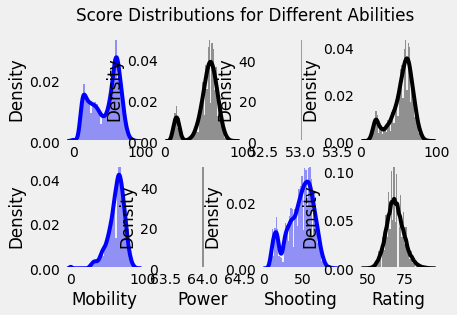

In [47]:
# plt.rcParams['figure.figsize'] = (18, 12)
plt.subplot(2, 4, 1)
sns.distplot(fifa['Defending'], color = 'blue')
plt.grid()

plt.subplot(2, 4, 2)
sns.distplot(fifa['General'], color = 'black')
plt.grid()

plt.subplot(2, 4, 3)
sns.distplot(fifa['Mental'], color = 'blue')
plt.grid()

plt.subplot(2, 4, 4)
sns.distplot(fifa['Passing'], color = 'black')
plt.grid()

plt.subplot(2, 4, 5)
sns.distplot(fifa['Mobility'], color = 'blue')
plt.grid()

plt.subplot(2, 4, 6)
sns.distplot(fifa['Power'], color = 'black')
plt.grid()

plt.subplot(2, 4, 7)
sns.distplot(fifa['Shooting'], color = 'blue')
plt.grid()

plt.subplot(2, 4, 8)
sns.distplot(fifa['Rating'], color = 'black')
plt.grid()

plt.suptitle('Score Distributions for Different Abilities')
plt.show()

# Distribution of Week Foot among Players

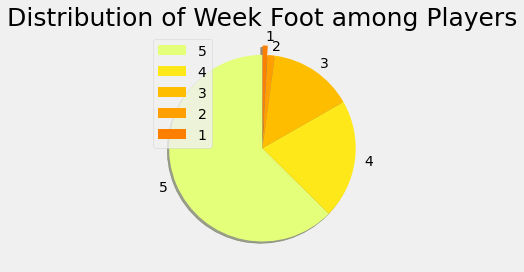

In [48]:
labels = ['5', '4', '3', '2', '1'] 
size = fifa['Weak Foot'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
explode = [0, 0, 0, 0, 0.1]

plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Distribution of Week Foot among Players', fontsize = 25)
plt.legend()
plt.show()

# best players in the game and their clubs

In [49]:
club = fifa.groupby('Club')['Overall'].mean().reset_index().sort_values('Overall', ascending=True).tail(20)
fig = px.bar(club, x="Overall", y="Club", orientation='h')
fig.show()

# player positions and what they are good at:

In [50]:
player_features = ['Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed',
       'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping',
       'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions',
       'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking',
       'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']
df_postion  = pd.DataFrame()
for position_name, features in fifa.groupby(fifa['Position'])[player_features].mean().iterrows():
    top_features = dict(features.nlargest(5))
    df_postion[position_name] = tuple(top_features)
df_postion.head()

CAM               CB           CDM            CF            CM  \
0       Balance         Strength       Stamina       Agility       Balance   
1       Agility          Jumping    Aggression       Balance  ShortPassing   
2  Acceleration   StandingTackle      Strength  Acceleration       Agility   
3   SprintSpeed       Aggression  ShortPassing   SprintSpeed       Stamina   
4   BallControl  HeadingAccuracy       Jumping     Dribbling  Acceleration   

              GK           LAM            LB              LCB           LCM  \
0     GKReflexes       Agility   SprintSpeed         Strength       Stamina   
1       GKDiving       Balance  Acceleration          Jumping  ShortPassing   
2  GKPositioning   SprintSpeed       Stamina   StandingTackle       Balance   
3     GKHandling  Acceleration       Balance       Aggression       Agility   
4      GKKicking     Dribbling       Agility  HeadingAccuracy   BallControl   

   ...            RB              RCB           RCM           RDM  \
0  ...   SprintSpeed         Strength       Stamina       Stamina   
1  ...       Stamina          Jumping  ShortPassing  ShortPassing   
2  ...  Acceleration       Aggression       Agility    Aggression   
3  ...       Balance   StandingTackle       Balance      Strength   
4  ...       Jumping  HeadingAccuracy   BallControl       Jumping   

             RF            RM            RS            RW           RWB  \
0       Agility  Acceleration   SprintSpeed  Acceleration   SprintSpeed   
1  Acceleration   SprintSpeed      Strength   SprintSpeed  Acceleration   
2       Balance       Agility  Acceleration       Agility       Stamina   
3   BallControl       Balance       Agility       Balance       Agility   
4   SprintSpeed     Dribbling     ShotPower     Dribbling       Balance   

             ST  
0   SprintSpeed  
1      Strength  
2  Acceleration  
3       Jumping  
4     Finishing  

[5 rows x 27 columns]

# best players in their positions:

In [51]:
position = []
player = []
club_l = []
for col in df_postion.columns:
    tmp_df = pd.DataFrame()
    l = [df_postion[col].values]
    l = l[0]
    l = list(l)
    l.append('Name')
    tmp_df = pd.DataFrame.copy(fifa[fifa['Position'] == col][l])
    tmp_df['mean'] = np.mean(tmp_df.iloc[: , :-1] , axis = 1)
    name = tmp_df['Name'][tmp_df['mean'] == tmp_df['mean'].max()].values[0]
    club = fifa['Club'][fifa['Name'] == str(name)].values[0]
    position.append(col)
    player.append(name)
    club_l.append(club)
    
gk = ['GK']
forward = ['LS', 'ST', 'RS','LF', 'CF', 'RF']
midfeilder = ['LW','RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM',
              'RCM', 'RM', 'LDM', 'CDM', 'RDM' ]
defenders = ['LWB','RWB', 'LB', 'LCB', 'CB',]

print('GoalKeeper : ')
for p , n , c in zip(position , player , club_l):
    if p in gk:
        print('{} [Club : {} , Position : {}]'.format(n , c , p))
print('\nFORWARD : ')
for p , n , c in zip(position , player , club_l):
    if p in forward:
        print('{} [Club : {} , Position : {}]'.format(n , c , p))
print('\nMIDFEILDER : ')
for p , n , c in zip(position , player , club_l):
    if p in midfeilder:
        print('{} [Club : {} , Position : {}]'.format(n , c , p))
print('\nDEFENDER : ')
for p , n , c in zip(position , player , club_l):
    if p in defenders:
        print('{} [Club : {} , Position : {}]'.format(n , c , p))

GoalKeeper : 
De Gea [Club : Manchester United , Position : GK]

FORWARD : 
S. Giovinco [Club : Toronto FC , Position : CF]
E. Hazard [Club : Chelsea , Position : LF]
J. Martínez [Club : Atlanta United , Position : LS]
L. Messi [Club : FC Barcelona , Position : RF]
A. Saint-Maximin [Club : OGC Nice , Position : RS]
Cristiano Ronaldo [Club : Juventus , Position : ST]

MIDFEILDER : 
H. Nakagawa [Club : Kashiwa Reysol , Position : CAM]
Casemiro [Club : Real Madrid , Position : CDM]
N. Keïta [Club : Liverpool , Position : CM]
Paulo Daineiro [Club : Ceará Sporting Club , Position : LAM]
David Silva [Club : Manchester City , Position : LCM]
N. Kanté [Club : Chelsea , Position : LDM]
Douglas Costa [Club : Juventus , Position : LM]
Neymar Jr [Club : Paris Saint-Germain , Position : LW]
J. Cuadrado [Club : Juventus , Position : RAM]
L. Modrić [Club : Real Madrid , Position : RCM]
P. Pogba [Club : Manchester United , Position : RDM]
Gelson Martins [Club : Atlético Madrid , Position : RM]
R. Ster

In [52]:
fifdf[fifdf['International Reputation'] == 5][['Name','Nationality',
                            'Overall']].sort_values(by = 'Overall',
                                        ascending = False).style.background_gradient(cmap = 'magma')

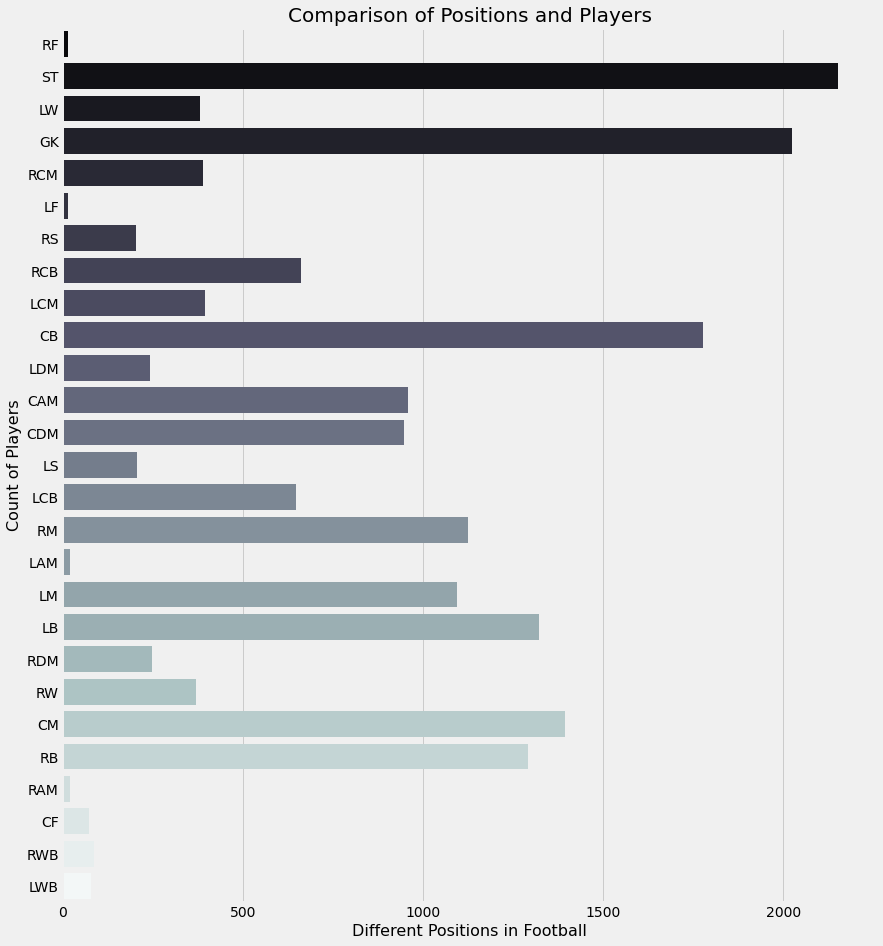

In [53]:
# different positions acquired by the players 

plt.figure(figsize = (13, 15))
plt.style.use('fivethirtyeight')
ax = sns.countplot(y = 'Position', data = fifdf, palette = 'bone')
ax.set_xlabel(xlabel = 'Different Positions in Football', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of Players', fontsize = 16)
ax.set_title(label = 'Comparison of Positions and Players', fontsize = 20)
plt.show()

In [54]:
fifad[fifad['Preferred Foot'] == 'Right'][['Name', 'Age', 'Club',
                    'Nationality', 'Overall']].sort_values(by = 'Overall',
                            ascending = False).head(10).style.background_gradient(cmap = 'copper')

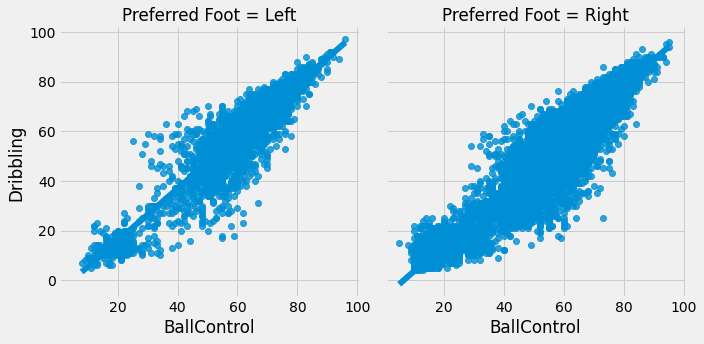

In [55]:
# comparing the performance of left-footed and right-footed footballers
# ballcontrol vs dribbing

sns.lmplot(x = 'BallControl', y = 'Dribbling', data = fifad, col = 'Preferred Foot')
plt.show()


C:\Users\asash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



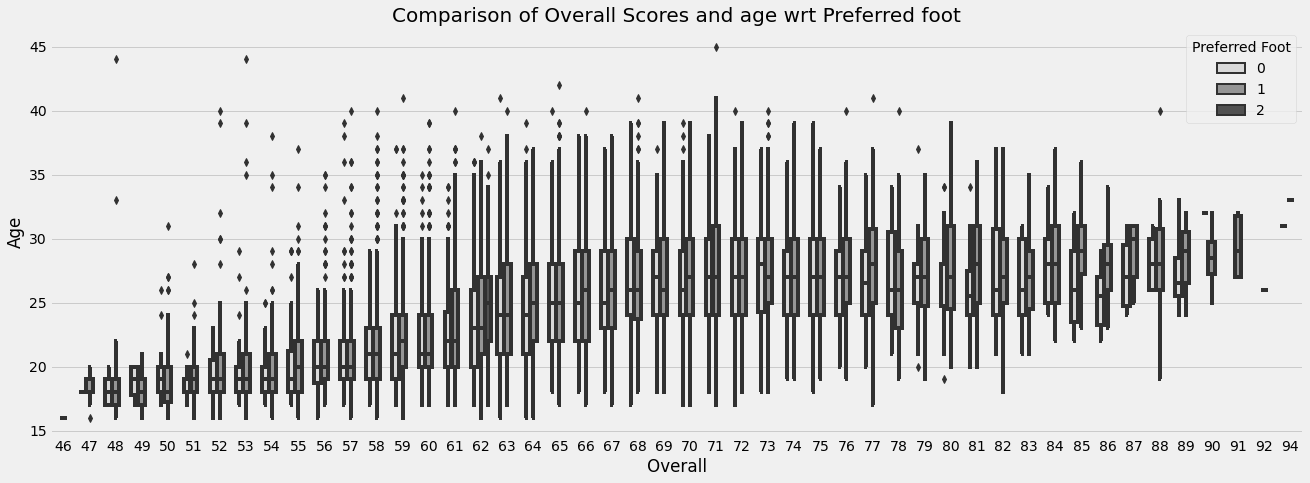

In [56]:
plt.rcParams['figure.figsize'] = (20, 7)
plt.style.use('seaborn-dark-palette')

sns.boxplot(fifdf['Overall'], fifdf['Age'], hue = fifdf['Preferred Foot'], palette = 'Greys')
plt.title('Comparison of Overall Scores and age wrt Preferred foot', fontsize = 20)
plt.show()